# 1. fashion MNIST
다음의 조건을 만족하면서 test 데이터에 대한 예측의 정확도를 최대로 높여라.
* CNN을 이용한다. 그 외에 인공신경망 구조는 자유롭게 선택한다.
* model은 클래스를 이용하여 직접 작성한다.
* output은 10개(0~9)로 설정한다.

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
from torch.utils.data import Dataset, DataLoader
import math

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from torchvision import datasets
import torchvision.transforms as transforms

torch.set_printoptions(linewidth=120)
import time

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
from torchvision.transforms import ToTensor

train_data = torchvision.datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.5,), (0.5,))
                   ])
)

test_data = torchvision.datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.5,), (0.5,))
                   ])
)

In [3]:
# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size = 1000

# prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data, 
                                           batch_size=batch_size,
                                           shuffle = True,
                                           num_workers=num_workers)

test_loader = torch.utils.data.DataLoader(test_data, 
                                          batch_size=batch_size,
                                          shuffle = False,
                                          num_workers=num_workers)

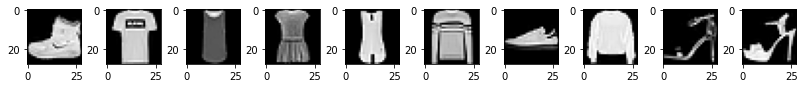

In [4]:
plt.figure(figsize=(14,1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(train_data.data[i],cmap=plt.cm.gray);

In [5]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

In [6]:
class Network(nn.Module):
    def __init__(self):
        super(Network, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=5, padding=0),
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2)
        )
        
        self.layer2 = nn.Sequential(
            nn.Conv2d(32, 32, kernel_size=5, padding=0),
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2)
        )
        
        self.fc = nn.Sequential(
            nn.Linear(4*4*32, 300),
            nn.ReLU(inplace=True),
            nn.Linear(300, 300),
            nn.ReLU(inplace=True),
            nn.Linear(300, 300),
            nn.ReLU(inplace=True),
            nn.Linear(300, 10),
        )

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
    
        return x

In [7]:
device = torch.device("cpu")

model = Network().to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-4, weight_decay=3e-3)

In [8]:
def train(model, epoch, train_loader, device, optimizer):
    model.train()
    for batch_i, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        
        output = model(data)
        loss = F.cross_entropy(output, target)
        
        loss.backward()
        optimizer.step()
        
#         if batch % 100 == 0:
#             print(f"Train Epoch: {epoch} [{batch * len(data)}/{len(train_loader.dataset)}({(100. * batch / len(train_loader)):.0f}%)] \tLoss: {loss.item():.6f}")
            
    print(f"\n Train Epoch: {epoch} \tLoss: {loss.item():.6f}")
    return loss

In [9]:
def test(model, test_loader, device):
    model.eval()
    loss = 0
    correct = 0
    with torch.no_grad():
        for batch_i, (data, target) in enumerate(test_loader):
            data, target = data.to(device), target.to(device)
            output = model(data)
            loss = F.cross_entropy(output, target)
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()
            Accuracy = 100. * correct / len(test_loader.dataset)

    print(f"\nTest set: loss: {loss.item():.6f}, Accuracy: {correct}/{len(test_loader.dataset)}({(100. * correct / len(test_loader.dataset)):.2f}%)\n")
    print('----------------------------------------------------')
    return loss, Accuracy

In [10]:
train_loss=[]
test_loss=[]
test_Accuracy = []
def main():
    best_Accuracy = 0
    Accuracy = 0
    i = 0
    for epoch in range(1, epochs+1):
        best_Accuracy = max(best_Accuracy,Accuracy)  
        loss=train(model, epoch, train_loader, device, optimizer)
        train_loss.append(loss.detach())
        loss,Accuracy=test(model, test_loader, device)
        test_loss.append(loss)
        test_Accuracy.append(Accuracy)
        if best_Accuracy >= Accuracy:
            i = i+1
        elif best_Accuracy < Accuracy:
            i = 0  
        if i == 30:
            break

In [11]:
epochs=1000
main()


 Train Epoch: 1 	Loss: 0.949957

Test set: loss: 0.970243, Accuracy: 7212/10000(72.12%)

----------------------------------------------------

 Train Epoch: 2 	Loss: 0.546005

Test set: loss: 0.569541, Accuracy: 7872/10000(78.72%)

----------------------------------------------------

 Train Epoch: 3 	Loss: 0.491224

Test set: loss: 0.479446, Accuracy: 8245/10000(82.45%)

----------------------------------------------------

 Train Epoch: 4 	Loss: 0.419592

Test set: loss: 0.442668, Accuracy: 8449/10000(84.49%)

----------------------------------------------------

 Train Epoch: 5 	Loss: 0.335150

Test set: loss: 0.403316, Accuracy: 8546/10000(85.46%)

----------------------------------------------------

 Train Epoch: 6 	Loss: 0.339205

Test set: loss: 0.372311, Accuracy: 8641/10000(86.41%)

----------------------------------------------------

 Train Epoch: 7 	Loss: 0.323310

Test set: loss: 0.360779, Accuracy: 8674/10000(86.74%)

----------------------------------------------------


 Train Epoch: 58 	Loss: 0.156707

Test set: loss: 0.310347, Accuracy: 8967/10000(89.67%)

----------------------------------------------------

 Train Epoch: 59 	Loss: 0.134028

Test set: loss: 0.308250, Accuracy: 8964/10000(89.64%)

----------------------------------------------------

 Train Epoch: 60 	Loss: 0.120282

Test set: loss: 0.297287, Accuracy: 8964/10000(89.64%)

----------------------------------------------------

 Train Epoch: 61 	Loss: 0.126618

Test set: loss: 0.308201, Accuracy: 8953/10000(89.53%)

----------------------------------------------------

 Train Epoch: 62 	Loss: 0.141726

Test set: loss: 0.304189, Accuracy: 8965/10000(89.65%)

----------------------------------------------------

 Train Epoch: 63 	Loss: 0.137705

Test set: loss: 0.318120, Accuracy: 8955/10000(89.55%)

----------------------------------------------------

 Train Epoch: 64 	Loss: 0.141979

Test set: loss: 0.307082, Accuracy: 8944/10000(89.44%)

---------------------------------------------

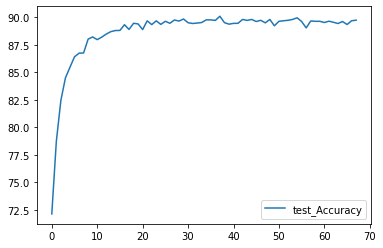

In [12]:
plt.plot(test_Accuracy,label='test_Accuracy')
plt.legend()

In [13]:
max(test_Accuracy)

90.1

Epoch 30번 동안 best_Accuracy가 갱신되지 않는다면 더 이상의 Tranining은 의미가 없다고 판단했다.

best_Accuracy 는 90.1% 이다.

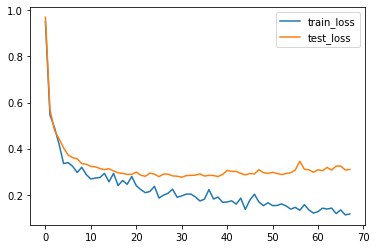

In [14]:
plt.plot(train_loss,label='train_loss')
plt.plot(test_loss,label='test_loss')
plt.legend()

Overfitting이 발생했다. Overfitting을 방지하는 방법으로는 여러가지가 있다.

In [15]:
class Network(nn.Module):
    def __init__(self):
        super(Network, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=5, padding=0),
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2)
        )
        
        self.layer2 = nn.Sequential(
            nn.Conv2d(32, 32, kernel_size=5, padding=0),
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2)
        )
        
        self.fc = nn.Sequential(
            nn.Linear(4*4*32, 300),
            nn.ReLU(inplace=True),
            nn.Linear(300, 300),
            nn.ReLU(inplace=True),
            nn.Linear(300, 300),
            nn.ReLU(inplace=True),
            nn.Linear(300, 10),
            nn.Softmax(dim=1)
        )

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
    
        return x
    
device = torch.device("cpu")

model = Network().to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-4, weight_decay=3e-3)

train_loss_soft=[]
test_loss_soft=[]
test_Accuracy_soft = []
def main():
    best_Accuracy = 0
    Accuracy = 0
    i = 0
    for epoch in range(1, epochs+1):
        best_Accuracy = max(best_Accuracy,Accuracy)  
        loss=train(model, epoch, train_loader, device, optimizer)
        train_loss_soft.append(loss.detach())
        loss,Accuracy=test(model, test_loader, device)
        test_loss_soft.append(loss)
        test_Accuracy_soft.append(Accuracy)
        if best_Accuracy >= Accuracy:
            i = i+1
        elif best_Accuracy < Accuracy:
            i = 0  
        if i == 30:
            break
    
epochs=1000
main()


 Train Epoch: 1 	Loss: 2.094002

Test set: loss: 2.091793, Accuracy: 3989/10000(39.89%)

----------------------------------------------------

 Train Epoch: 2 	Loss: 1.773919

Test set: loss: 1.760538, Accuracy: 7583/10000(75.83%)

----------------------------------------------------

 Train Epoch: 3 	Loss: 1.702298

Test set: loss: 1.701296, Accuracy: 7878/10000(78.78%)

----------------------------------------------------

 Train Epoch: 4 	Loss: 1.674092

Test set: loss: 1.674861, Accuracy: 8066/10000(80.66%)

----------------------------------------------------

 Train Epoch: 5 	Loss: 1.647150

Test set: loss: 1.663521, Accuracy: 8157/10000(81.57%)

----------------------------------------------------

 Train Epoch: 6 	Loss: 1.632932

Test set: loss: 1.655216, Accuracy: 8229/10000(82.29%)

----------------------------------------------------

 Train Epoch: 7 	Loss: 1.636719

Test set: loss: 1.649179, Accuracy: 8255/10000(82.55%)

----------------------------------------------------


 Train Epoch: 58 	Loss: 1.535153

Test set: loss: 1.578145, Accuracy: 8930/10000(89.30%)

----------------------------------------------------

 Train Epoch: 59 	Loss: 1.534330

Test set: loss: 1.576442, Accuracy: 8922/10000(89.22%)

----------------------------------------------------

 Train Epoch: 60 	Loss: 1.540493

Test set: loss: 1.577747, Accuracy: 8934/10000(89.34%)

----------------------------------------------------

 Train Epoch: 61 	Loss: 1.530816

Test set: loss: 1.576858, Accuracy: 8935/10000(89.35%)

----------------------------------------------------

 Train Epoch: 62 	Loss: 1.538012

Test set: loss: 1.574844, Accuracy: 8936/10000(89.36%)

----------------------------------------------------

 Train Epoch: 63 	Loss: 1.534537

Test set: loss: 1.582608, Accuracy: 8915/10000(89.15%)

----------------------------------------------------

 Train Epoch: 64 	Loss: 1.543689

Test set: loss: 1.576258, Accuracy: 8937/10000(89.37%)

---------------------------------------------


 Train Epoch: 115 	Loss: 1.508198

Test set: loss: 1.576299, Accuracy: 8943/10000(89.43%)

----------------------------------------------------


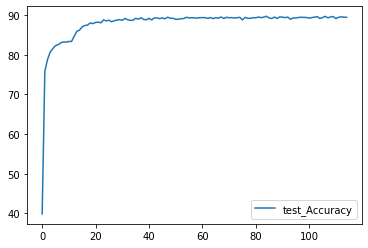

In [16]:
plt.plot(test_Accuracy_soft,label='test_Accuracy')
plt.legend()

In [17]:
max(test_Accuracy_soft)

89.7

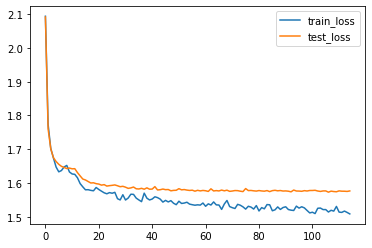

In [18]:
plt.plot(train_loss_soft,label='train_loss')
plt.plot(test_loss_soft,label='test_loss')
plt.legend()

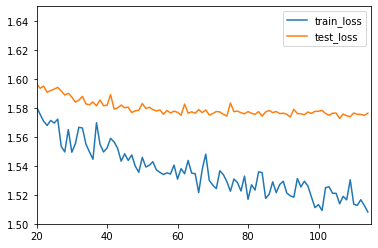

In [26]:
plt.xlim([20,115])
plt.ylim([1.5,1.65])
plt.plot(train_loss_soft,label='train_loss')
plt.plot(test_loss_soft,label='test_loss')
plt.legend()

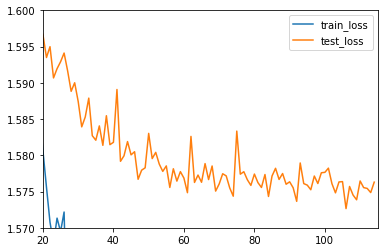

In [29]:
plt.xlim([20,115])
plt.ylim([1.57,1.6])
plt.plot(train_loss_soft,label='train_loss')
plt.plot(test_loss_soft,label='test_loss')
plt.legend()

fc의 끝에 Softmax를 추가하는 것으로도 Overfitting을 방지할 수 있다.

# 소감문

알파폴드는 누군가가 해놓은 CNN알고리즘과 Transformar알고리즘에 학자들이 오랜 기간 만들어 놓은 공개 데이터를 가져와 쓴 결과다. 베이커 그룹이 기존의 알파폴드1에 각도를 추가해서 더 업데이트 한 것이 결코 잘못된 건 아니며 결국 성과가 있었기 때문에 이게 제자리에 머무는 행위였다고 생각지도 않는다. 그러나 기존의 것을 과감히 버리고 새로운 것을 도입해서 더 좋은 결과를 낸 알파폴드는 판을 뒤집었고, 세상의 발전은 이러한 것들이 많이 시도되어야한다. 다행히도 우리가 전통적인 물리학에 AI를 접목시킬 기회 또한 많이 남아있다. 이 글을 읽으면서 Transformar 알고리즘과 attention에 대해 조금 찾아봤다. 현재 나는 연구실에서 AI에게 hh와 bkg image를 분류시켜 significance를 구하고 있는데, 여기에 접목시킬수 있지 않을까해서이다. 결국 알파폴드1도 CNN을 이용해서 가능했고, Transformar을 이용해서 알파폴드2가 된것처럼 CNN과 비슷한 네트워크들을 이용한 이 연구도 알파폴드2처럼 Transformar를 이용할 수 있을 것이라 생각된다. 만약 더 좋은 결과가 나온다면, 비록 알파폴드를 따라간 것 뿐이지만 입자물리는 한단계 더 업그레이드 될 수 있을 것이다.

공백 제외 491자